In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
#Import happiness and overweight data sets
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
happy15=pd.DataFrame(pd.read_csv('CSVs/Happiness_2015.csv'))
overweight=pd.DataFrame(pd.read_csv('CSVs/overweight_adults.csv'))

overweight.head()

,Unnamed: 0,2016,2015
0,NaN,"Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr..."
1,NaN,18+ years,18+ years
2,Country,Both sexes,Both sexes
3,Afghanistan,19.7 [15.8-24.0],19.1 [15.5-23.3]
4,Albania,58.7 [53.8-63.5],58.0 [53.2-62.5]


In [3]:
#Clean overweight dataframe
overweight=overweight.drop([0,1,2])
overweight=overweight.rename(columns={'Unnamed: 0':'Country'})
overweight.dtypes

Country    object
2016       object
2015       object
dtype: object

In [4]:
#Separate percent from estimate range for 2016
ov_split16 = overweight['2016'].str.split(' ', n=1, expand=True)
overweight['2016 Percent']=ov_split16[0]
overweight.head()

,Country,2016,2015,2016 Percent
3,Afghanistan,19.7 [15.8-24.0],19.1 [15.5-23.3],19.7
4,Albania,58.7 [53.8-63.5],58.0 [53.2-62.5],58.7
5,Algeria,60.7 [56.0-65.4],59.5 [55.1-64.0],60.7
6,Andorra,68.1 [63.1-72.7],67.7 [63.0-72.2],68.1
7,Angola,23.9 [19.0-29.2],23.3 [18.6-28.3],23.9


In [5]:
#Separate percent from estimate range for 2015
ov_split15 = overweight['2015'].str.split(' ', n=1, expand=True)
overweight['2015 Percent']=ov_split15[0]
overweight.head()

,Country,2016,2015,2016 Percent,2015 Percent
3,Afghanistan,19.7 [15.8-24.0],19.1 [15.5-23.3],19.7,19.1
4,Albania,58.7 [53.8-63.5],58.0 [53.2-62.5],58.7,58.0
5,Algeria,60.7 [56.0-65.4],59.5 [55.1-64.0],60.7,59.5
6,Andorra,68.1 [63.1-72.7],67.7 [63.0-72.2],68.1,67.7
7,Angola,23.9 [19.0-29.2],23.3 [18.6-28.3],23.9,23.3


In [6]:
#Narrow columns and eliminate blank and n/a cells
overweight=overweight[['Country','2016 Percent','2015 Percent']]
overweight=overweight.replace(r'^\s*$', np.nan, regex=True)
overweight=overweight.dropna(how='any')
overweight.head()

,Country,2016 Percent,2015 Percent
3,Afghanistan,19.7,19.1
4,Albania,58.7,58.0
5,Algeria,60.7,59.5
6,Andorra,68.1,67.7
7,Angola,23.9,23.3


In [7]:
#Calcualte average percent overweight across 2 years
overweight['2016 Percent'] = pd.to_numeric(overweight['2016 Percent'], errors='coerce')
overweight['2015 Percent'] = pd.to_numeric(overweight['2015 Percent'], errors='coerce')
overweight['Mean Percent Overweight (2015 & 2016)']=((overweight['2016 Percent'] + overweight['2015 Percent'])/2)
overweight.head()

,Country,2016 Percent,2015 Percent,Mean Percent Overweight (2015 & 2016)
3,Afghanistan,19.7,19.1,19.40
4,Albania,58.7,58.0,58.35
5,Algeria,60.7,59.5,60.10
6,Andorra,68.1,67.7,67.90
7,Angola,23.9,23.3,23.60


In [8]:
#Merge happiness data for 2016 and 2015
happy = pd.merge(happy16, happy15, on = 'Country', how = 'inner')
happy = happy[['Country', 'Happiness Score_x', 'Happiness Score_y']]
happy.head()

,Country,Happiness Score_x,Happiness Score_y
0,Denmark,7.526,7.527
1,Switzerland,7.509,7.587
2,Iceland,7.501,7.561
3,Norway,7.498,7.522
4,Finland,7.413,7.406


In [9]:
#Calculate average happiness across 2 years and merge with overweight data
happy['Average Happiness (2015 & 2016)'] = ((happy['Happiness Score_x'] + happy['Happiness Score_y'])/2)
happy_overweight = pd.merge(happy, overweight, on='Country', how='inner')
happy_overweight=happy_overweight.replace(r'^\s*$', np.nan, regex=True)
happy_overweight=happy_overweight.dropna(how='any')
happy_overweight.head()

,Country,Happiness Score_x,Happiness Score_y,Average Happiness (2015 & 2016),2016 Percent,2015 Percent,Mean Percent Overweight (2015 & 2016)
0,Denmark,7.526,7.527,7.5265,59.2,58.8,59.00
1,Switzerland,7.509,7.587,7.5480,57.9,57.4,57.65
2,Iceland,7.501,7.561,7.5310,61.5,61.0,61.25
3,Norway,7.498,7.522,7.5100,61.7,61.2,61.45
4,Finland,7.413,7.406,7.4095,62.5,62.1,62.30


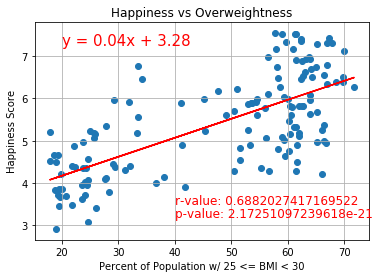

R-value: 0.6882027417169522, P-value: 2.17251097239618e-21


In [10]:
#Linear Regression!
y_values=happy_overweight['Average Happiness (2015 & 2016)']
x_values=happy_overweight['Mean Percent Overweight (2015 & 2016)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Overweightness')
plt.xlabel('Percent of Population w/ 25 <= BMI < 30')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(20,7.25),fontsize=15,color="red")
plt.annotate(r_value,(40,3.5),fontsize=12,color="red")
plt.annotate(p_value,(40,3.2),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/overweight.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [12]:
#Moderate positive correlation
len(happy_overweight)

143

In [18]:
#Import data with ISO country codes, merge with happiness and overweight data
iso=pd.read_csv('csvs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso2 = pd.merge(happy_overweight, iso, on='Country', how='inner')
iso2=iso2[['iso_a3','Average Happiness (2015 & 2016)', 'Mean Percent Overweight (2015 & 2016)']]
iso2.head()

,iso_a3,Average Happiness (2015 & 2016),Mean Percent Overweight (2015 & 2016)
0,DNK,7.5265,59.00
1,CHE,7.5480,57.65
2,ISL,7.5310,61.25
3,NOR,7.5100,61.45
4,FIN,7.4095,62.30


In [20]:
#Import dataset with geographical info for graphing
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = pd.merge(world, iso2, on='iso_a3', how='inner')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Average Happiness (2015 & 2016),Mean Percent Overweight (2015 & 2016)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.7235,24.15
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.4155,67.25
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",7.1115,69.90
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",5.8870,53.50
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5.9950,45.20


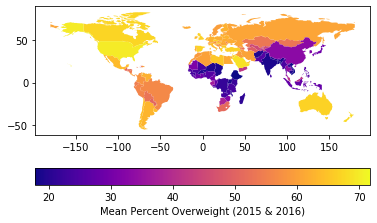

In [21]:
#chorograph of percent overweight
fig, ax = plt.subplots(1,1)
world.plot(column='Mean Percent Overweight (2015 & 2016)', cmap='plasma', ax=ax, legend=True, 
           legend_kwds={'label': "Mean Percent Overweight (2015 & 2016)", 'orientation': "horizontal"})

plt.savefig('Images/percent_overweight_map.png')

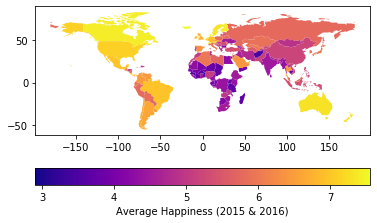

In [22]:
#chorograph of average happiness score across 2015 and 2016
fig, ax = plt.subplots(1,1)
world.plot(column='Average Happiness (2015 & 2016)', cmap='plasma', ax=ax, legend=True, 
           legend_kwds={'label': "Average Happiness (2015 & 2016)", 'orientation':'horizontal'})

plt.savefig('Images/average_happiness_map.png')